In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
car_train_df = pd.read_csv('./car_evaluation_train.csv', sep=',')
print("Tập train có kích thước là:", car_train_df.shape)
car_train_df.head()

Tập train có kích thước là: (1382, 7)


,buying,maint,doors,persons,lug_boot,safety,class
0,med,low,2,4,big,low,unacc
1,low,high,5more,more,med,low,unacc
2,high,high,4,4,small,low,unacc
3,low,low,2,2,med,low,unacc
4,med,med,3,more,small,low,unacc


In [3]:
car_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1382 non-null   object
 1   maint     1382 non-null   object
 2   doors     1382 non-null   object
 3   persons   1382 non-null   object
 4   lug_boot  1382 non-null   object
 5   safety    1382 non-null   object
 6   class     1382 non-null   object
dtypes: object(7)
memory usage: 75.7+ KB


<AxesSubplot:xlabel='class', ylabel='number of samples per class'>

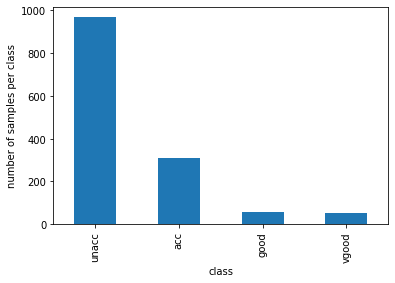

In [4]:
car_train_df.iloc[:, -1].value_counts().plot(kind='bar', xlabel='class', ylabel = 'number of samples per class')

In [5]:
car_test_df = pd.read_csv('./car_evaluation_test.csv', sep=',')
print("Tập test có kích thước là:", car_test_df.shape)
car_test_df.head()

Tập test có kích thước là: (346, 7)


,buying,maint,doors,persons,lug_boot,safety,class
0,high,low,3,2,big,med,unacc
1,med,med,3,more,med,low,unacc
2,med,med,2,2,big,high,unacc
3,high,med,2,4,small,med,unacc
4,high,vhigh,2,more,med,low,unacc


In [6]:
car_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    346 non-null    object
 1   maint     346 non-null    object
 2   doors     346 non-null    object
 3   persons   346 non-null    object
 4   lug_boot  346 non-null    object
 5   safety    346 non-null    object
 6   class     346 non-null    object
dtypes: object(7)
memory usage: 19.0+ KB


<AxesSubplot:>

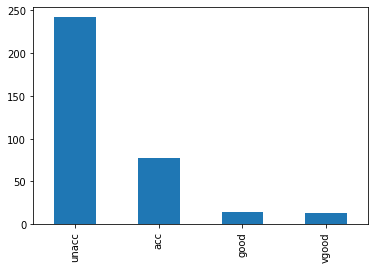

In [7]:
car_test_df.iloc[:, -1].value_counts().plot(kind='bar')

In [8]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols = car_train_df.columns[:-1])
car_train_data = encoder.fit_transform(car_train_df.iloc[:, :-1]).to_numpy()
car_train_target = car_train_df.iloc[:, -1].to_numpy()

car_test_data = encoder.fit_transform(car_test_df.iloc[:, :-1]).to_numpy()
car_test_target = car_test_df.iloc[:, -1].to_numpy()

In [9]:
car_train_data

array([[1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 1],
       [3, 2, 3, 1, 3, 1],
       ...,
       [2, 3, 4, 1, 1, 3],
       [1, 3, 2, 2, 1, 3],
       [2, 1, 3, 1, 2, 3]])

In [10]:
decision_tree_clf = tree.DecisionTreeClassifier(criterion='entropy')
decision_tree_clf.fit(car_train_data, car_train_target)
y_pred = decision_tree_clf.predict(car_test_data)

print("Depth:", decision_tree_clf.get_depth())
print("Test Accuracy Score :", accuracy_score(y_pred, car_test_target))
print("Train Accuracy Score:", accuracy_score(decision_tree_clf.predict(car_train_data), car_train_target))

Depth: 13
Test Accuracy Score : 0.9739884393063584
Train Accuracy Score: 1.0


<AxesSubplot:title={'center':'Confusion Matrix For Test'}>

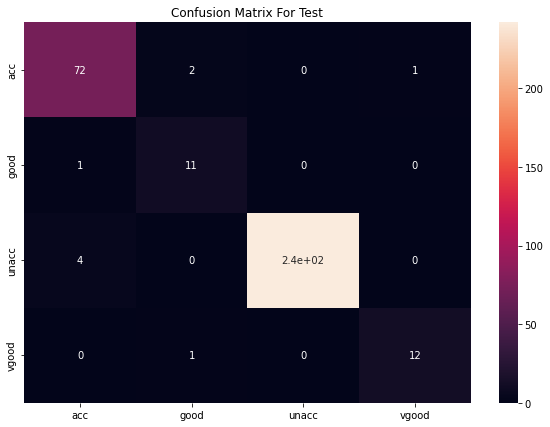

In [11]:
c_matrix = confusion_matrix(y_pred, car_test_target)
labels = np.unique(car_test_target).tolist()
c_matrix_df = pd.DataFrame(c_matrix, index = labels, columns=labels)
plt.figure(figsize=(10, 7))
plt.title("Confusion Matrix For Test")
sns.heatmap(c_matrix_df, annot=True)

In [12]:
from sklearn.tree import export_graphviz
dot_file_output_path = 'car_evaluation_tree_ordinal_encoder.dot'
dot_data = export_graphviz(decision_tree_clf, out_file=dot_file_output_path, feature_names=car_train_df.columns[:-1], class_names=car_train_df.iloc[:, -1])

In [13]:
from graphviz import Source
s = Source.from_file(dot_file_output_path)
s.render('car_evaluation_tree_ordinal_encoder', format='png',view=True)

'car_evaluation_tree_ordinal_encoder.png'

In [14]:
car_train_data = pd.get_dummies(car_train_df.iloc[:, :-1], drop_first=True).to_numpy()
car_train_target = car_train_df.iloc[:, -1].to_numpy()

car_test_data = pd.get_dummies(car_test_df.iloc[:, :-1], drop_first=True).to_numpy()
car_test_target = car_test_df.iloc[:, -1].to_numpy()

In [19]:
pd.get_dummies(car_train_df.iloc[:, :-1], drop_first=True)

,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med
0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
1,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0
2,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0
3,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
4,0,1,0,0,1,0,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0
1378,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0
1379,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0
1380,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0


In [15]:
decision_tree_clf = tree.DecisionTreeClassifier(criterion='entropy')
decision_tree_clf.fit(car_train_data, car_train_target)
y_pred = decision_tree_clf.predict(car_test_data)

print("Depth:", decision_tree_clf.get_depth())
print("Test Accuracy Score :", accuracy_score(y_pred, car_test_target))
print("Train Accuracy Score:", accuracy_score(decision_tree_clf.predict(car_train_data), car_train_target))

Depth: 15
Test Accuracy Score : 0.9364161849710982
Train Accuracy Score: 1.0


<AxesSubplot:title={'center':'Confusion Matrix For Test'}>

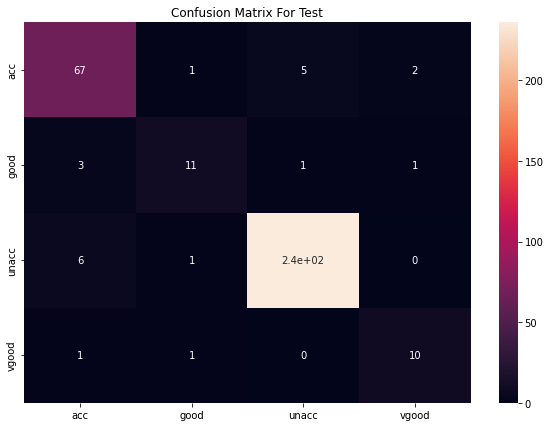

In [16]:
c_matrix = confusion_matrix(y_pred, car_test_target)
labels = np.unique(car_test_target).tolist()
c_matrix_df = pd.DataFrame(c_matrix, index = labels, columns=labels)
plt.figure(figsize=(10, 7))
plt.title("Confusion Matrix For Test")
sns.heatmap(c_matrix_df, annot=True)

In [17]:
from sklearn.tree import export_graphviz

dot_file_output_path = 'car_evaluation_tree_dummies_encoder.dot'

dot_data = export_graphviz(decision_tree_clf, out_file=dot_file_output_path, feature_names=pd.get_dummies(car_train_df.iloc[:, :-1], drop_first=True).columns, class_names=car_train_df.iloc[:, -1])

In [18]:
from graphviz import Source
s = Source.from_file(dot_file_output_path)
s.render('car_evaluation_tree_dummies_encoder', format='png')

'car_evaluation_tree_dummies_encoder.png'